In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('treat.csv')

C:\Users\nitis\AppData\Local\Temp\ipykernel_3276\4225538575.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('treat.csv')


In [3]:

df.head()

,Site recode ICD-O-3/WHO 2008,TNM 7/CS v0204+ Schema recode,Primary Site - labeled,Sex,Primary Site,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Site recode - rare tumors,Vital status recode (study cutoff used),Histologic Type ICD-O-3,...,Sequence number,"Race recode (W, B, AI, API)",First malignant primary indicator,Regional nodes examined (1988+),Regional nodes positive (1988+),RX Summ--Surg/Rad Seq,Reason no cancer-directed surgery,"Chemotherapy recode (yes, no/unk)",Age recode with single ages and 90,Year of diagnosis
0,Salivary Gland,ParotidGland,C07.9-Parotid gland,Female,79,"8070/3: Squamous cell carcinoma, NOS",8050-8089: squamous cell neoplasms,3.1 Epithelial tumor of major salivary glands,1,8070,...,2nd of 2 or more primaries,Black,Yes,1,0,No radiation and/or cancer-directed surgery,Surgery performed,No/Unknown,83,1993
1,Tonsil,Oropharynx,"C09.9-Tonsil, NOS",Male,99,"8071/3: Squamous cell carcinoma, keratinizing,...",8050-8089: squamous cell neoplasms,5.1 Squamous cell carcinoma with variants of o...,1,8071,...,1st of 2 or more primaries,White,Yes,24,2,Radiation after surgery,Surgery performed,No/Unknown,64,1992
2,Tongue,TongueBase,"C01.9-Base of tongue, NOS",Male,19,"8070/3: Squamous cell carcinoma, NOS",8050-8089: squamous cell neoplasms,5.1 Squamous cell carcinoma with variants of o...,1,8070,...,1st of 2 or more primaries,White,Yes,0,98,No radiation and/or cancer-directed surgery,Not recommended,No/Unknown,55,1993
3,Tongue,TongueAnterior,"C02.2-Ventral surface of tongue, NOS",Female,22,"8071/3: Squamous cell carcinoma, keratinizing,...",8050-8089: squamous cell neoplasms,6.1 Squamous cell carcinoma with variants of o...,0,8071,...,2nd of 2 or more primaries,White,No,1,0,No radiation and/or cancer-directed surgery,Surgery performed,No/Unknown,61,2016
4,Lip,LipUpper,C00.0-External upper lip,Male,0,"8070/3: Squamous cell carcinoma, NOS",8050-8089: squamous cell neoplasms,6.2 Squamous cell carcinoma with variants of lip,1,8070,...,3rd of 3 or more primaries,White,No,0,98,No radiation and/or cancer-directed surgery,Surgery performed,No/Unknown,90,2006


In [4]:
df.describe()

,Primary Site,Vital status recode (study cutoff used),Histologic Type ICD-O-3,SS seq # - mal+ins (mid detail),SS seq # 1975+ - mal+ins (mid detail),SS seq # 2000+ - mal+ins (mid detail),SS seq # - mal (mid detail),SS seq # 1975+ - mal (mid detail),SS seq # 2000+ - mal (mid detail),SS seq # - mal+ins (least detail),...,SS seq # 1975+ - mal (least detail),SS seq # 2000+ - mal (least detail),Record number recode,Year of follow-up recode,SS seq # 2000+ - mal+ins (most detail),SS seq # 2000+ - mal (most detail),Regional nodes examined (1988+),Regional nodes positive (1988+),Age recode with single ages and 90,Year of diagnosis
count,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,...,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000,113576.000000
mean,61.746214,0.584657,8111.215803,1.075896,1.075808,0.817620,1.067990,1.067902,0.812980,1.075896,...,1.067902,0.812980,1.243150,2013.087668,0.789014,0.786716,18.813121,66.307741,62.900754,2007.372975
std,41.301212,0.492783,143.528301,0.335602,0.335385,0.516291,0.306205,0.305966,0.504268,0.335602,...,0.305966,0.504268,0.578728,8.251638,0.455351,0.450376,32.161256,45.050500,14.227613,8.404885
min,0.000000,0.000000,8000.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1992.000000
25%,21.000000,0.000000,8070.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2007.000000,1.000000,1.000000,0.000000,2.000000,54.000000,2000.000000
50%,60.000000,1.000000,8070.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2017.000000,1.000000,1.000000,0.000000,98.000000,63.000000,2008.000000
75%,99.000000,1.000000,8071.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2020.000000,1.000000,1.000000,25.000000,98.000000,73.000000,2015.000000
max,148.000000,1.000000,9581.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,...,8.000000,7.000000,10.000000,2020.000000,6.000000,5.000000,99.000000,99.000000,90.000000,2020.000000


In [5]:
df = df[df['Vital status recode (study cutoff used)'] != 1]

In [6]:
df.head()

,Site recode ICD-O-3/WHO 2008,TNM 7/CS v0204+ Schema recode,Primary Site - labeled,Sex,Primary Site,"ICD-O-3 Hist/behav, malignant",Histology recode - broad groupings,Site recode - rare tumors,Vital status recode (study cutoff used),Histologic Type ICD-O-3,...,Sequence number,"Race recode (W, B, AI, API)",First malignant primary indicator,Regional nodes examined (1988+),Regional nodes positive (1988+),RX Summ--Surg/Rad Seq,Reason no cancer-directed surgery,"Chemotherapy recode (yes, no/unk)",Age recode with single ages and 90,Year of diagnosis
3,Tongue,TongueAnterior,"C02.2-Ventral surface of tongue, NOS",Female,22,"8071/3: Squamous cell carcinoma, keratinizing,...",8050-8089: squamous cell neoplasms,6.1 Squamous cell carcinoma with variants of o...,0,8071,...,2nd of 2 or more primaries,White,No,1,0,No radiation and/or cancer-directed surgery,Surgery performed,No/Unknown,61,2016
11,Tongue,TongueBase,"C01.9-Base of tongue, NOS",Female,19,"8070/3: Squamous cell carcinoma, NOS",8050-8089: squamous cell neoplasms,5.1 Squamous cell carcinoma with variants of o...,0,8070,...,One primary only,Asian or Pacific Islander,Yes,0,98,Radiation after surgery,Surgery performed,No/Unknown,42,1994
12,Tongue,TongueAnterior,C02.8-Overlapping lesion of tongue,Female,28,"8070/3: Squamous cell carcinoma, NOS",8050-8089: squamous cell neoplasms,5.1 Squamous cell carcinoma with variants of o...,0,8070,...,2nd of 2 or more primaries,White,No,0,98,No radiation and/or cancer-directed surgery,Surgery performed,No/Unknown,63,2012
21,Gum and Other Mouth,PalateSoft,"C05.1-Soft palate, NOS",Female,51,8430/3: Mucoepidermoid carcinoma,8430-8439: mucoepidermoid neoplasms,3.2 Salivary gland type tumor of head and neck,0,8430,...,1st of 2 or more primaries,Black,Yes,18,0,Radiation before and after surgery,Surgery performed,No/Unknown,45,2000
30,Salivary Gland,ParotidGland,C07.9-Parotid gland,Female,79,8200/3: Adenoid cystic carcinoma,8140-8389: adenomas and adenocarcinomas,3.1 Epithelial tumor of major salivary glands,0,8200,...,4th of 4 or more primaries,White,No,0,98,No radiation and/or cancer-directed surgery,Not recommended,No/Unknown,65,2019


In [7]:

unique_values_counts = df['RX Summ--Surg/Rad Seq'].value_counts()

# Display the unique values and their counts
print("\nUnique values and their counts for '{}':".format('RX Summ--Surg/Rad Seq'))
print(unique_values_counts)




Unique values and their counts for 'RX Summ--Surg/Rad Seq':
RX Summ--Surg/Rad Seq
No radiation and/or cancer-directed surgery               29935
Radiation after surgery                                   16543
Radiation prior to surgery                                  470
Radiation before and after surgery                           88
Intraoperative rad with other rad before/after surgery       38
Sequence unknown, but both were given                        37
Surgery both before and after radiation                      31
Intraoperative radiation                                     31
Name: count, dtype: int64


In [8]:
df = df[df['RX Summ--Surg/Rad Seq'] != 'Sequence unknown, but both were given']
df = df[df['RX Summ--Surg/Rad Seq'] != 'Intraoperative radiation']


In [9]:
# a =unique_values = df[].unique()
unique_values_counts = df['RX Summ--Surg/Rad Seq'].value_counts()

# Display the unique values and their counts
print("\nUnique values and their counts for '{}':".format('RX Summ--Surg/Rad Seq'))
print(unique_values_counts)



Unique values and their counts for 'RX Summ--Surg/Rad Seq':
RX Summ--Surg/Rad Seq
No radiation and/or cancer-directed surgery               29935
Radiation after surgery                                   16543
Radiation prior to surgery                                  470
Radiation before and after surgery                           88
Intraoperative rad with other rad before/after surgery       38
Surgery both before and after radiation                      31
Name: count, dtype: int64


In [10]:
columns_to_drop = ['Year of follow-up recode','Total number of in situ/malignant tumors for patient','Reason no cancer-directed surgery','Chemotherapy recode (yes, no/unk)','Vital status recode (study cutoff used)']
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
df = pd.get_dummies(df, columns=['ICD-O-3 Hist/behav, malignant','Race recode (W, B, AI, API)','Sequence number','First malignant primary indicator','Race recode (W, B, AI, API)','Median household income inflation adj to 2021','Marital status at diagnosis','Laterality','Grade Recode (thru 2017)','Site recode - rare tumors','Histology recode - broad groupings','Primary Site','Primary Site - labeled','Site recode ICD-O-3/WHO 2008','TNM 7/CS v0204+ Schema recode','Sex'], dtype=int)



In [12]:
label_encoder = LabelEncoder()

df['RX Summ--Surg/Rad Seq'] = label_encoder.fit_transform(df['RX Summ--Surg/Rad Seq'])  

In [13]:
# a =unique_values = df[].unique()
unique_values_counts = df['RX Summ--Surg/Rad Seq'].value_counts()

# Display the unique values and their counts
print("\nUnique values and their counts for '{}':".format('RX Summ--Surg/Rad Seq'))
print(unique_values_counts)



Unique values and their counts for 'RX Summ--Surg/Rad Seq':
RX Summ--Surg/Rad Seq
1    29935
2    16543
4      470
3       88
0       38
5       31
Name: count, dtype: int64


In [14]:
df.head()

,Histologic Type ICD-O-3,SS seq # - mal+ins (mid detail),SS seq # 1975+ - mal+ins (mid detail),SS seq # 2000+ - mal+ins (mid detail),SS seq # - mal (mid detail),SS seq # 1975+ - mal (mid detail),SS seq # 2000+ - mal (mid detail),SS seq # - mal+ins (least detail),SS seq # 1975+ - mal+ins (least detail),SS seq # 2000+ - mal+ins (least detail),...,TNM 7/CS v0204+ Schema recode_PalateSoft,TNM 7/CS v0204+ Schema recode_ParotidGland,TNM 7/CS v0204+ Schema recode_PharyngealTonsil,TNM 7/CS v0204+ Schema recode_PharynxOther,TNM 7/CS v0204+ Schema recode_SalivaryGlandOther,TNM 7/CS v0204+ Schema recode_SubmandibularGland,TNM 7/CS v0204+ Schema recode_TongueAnterior,TNM 7/CS v0204+ Schema recode_TongueBase,Sex_Female,Sex_Male
3,8071,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
11,8070,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
12,8070,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
21,8430,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,1,0
30,8200,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,0


In [15]:
column_to_exclude = 'RX Summ--Surg/Rad Seq'

X = selected_columns = df.loc[:, df.columns != column_to_exclude]
y = df['RX Summ--Surg/Rad Seq']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt

In [18]:
classifiers = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=3)),
    ("XGBoost", XGBClassifier(
    learning_rate=0.1,  # Learning rate (step size for gradient descent)
    n_estimators=100,   # Number of boosting rounds
    max_depth=3,        # Maximum depth of each tree
    objective='binary:logistic'  # Binary classification objective
)
    )
]

# Initialize a list to store accuracy scores
accuracy_scores = []

# Train and evaluate each classifier, and store the accuracy scores
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


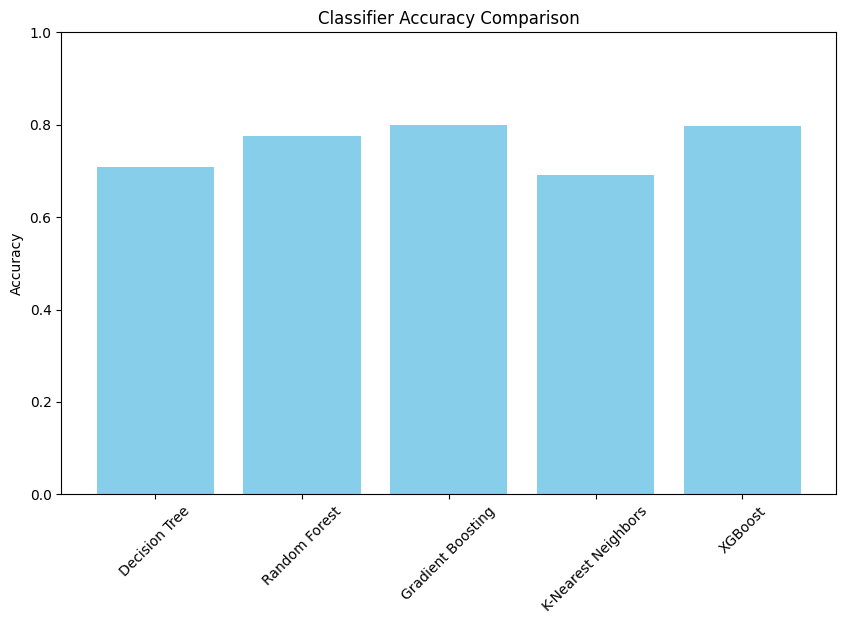

In [19]:
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in classifiers], accuracy_scores, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1.0)  # Set the y-axis limits if needed
plt.show()

In [20]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.82      0.88      0.85      5955
           2       0.75      0.68      0.71      3324
           3       0.00      0.00      0.00        17
           4       0.44      0.07      0.12       116
           5       0.00      0.00      0.00         4

    accuracy                           0.80      9421
   macro avg       0.34      0.27      0.28      9421
weighted avg       0.79      0.80      0.79      9421



c:\Users\nitis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nitis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nitis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Feature 1: Regional nodes positive (1988+) - Importance: 0.7627999244824044
Feature 2: ICD-O-3 Hist/behav, malignant_8200/3: Adenoid cystic carcinoma - Importance: 0.030494183390558118
Feature 3: Laterality_Not a paired  site - Importance: 0.017737424432450355
Feature 4: Year of diagnosis - Importance: 0.016149619881281867
Feature 5: Site recode ICD-O-3/WHO 2008_Tonsil - Importance: 0.014919187213341494
Feature 6: Regional nodes examined (1988+) - Importance: 0.013681857578901804
Feature 7: Site recode ICD-O-3/WHO 2008_Salivary Gland - Importance: 0.013484525263940488
Feature 8: Age recode with single ages and 90 - Importance: 0.012404044194988282
Feature 9: Marital status at diagnosis_Unknown - Importance: 0.010973486741169576
Feature 10: TNM 7/CS v0204+ Schema recode_TongueAnterior - Importance: 0.01022498395293639
Feature 11: Grade Recode (thru 2017)_Poorly differentiated; Grade III - Importance: 0.009535254947991671
Feature 12: Histologic Type ICD-O-3 - Importance: 0.00656112512576

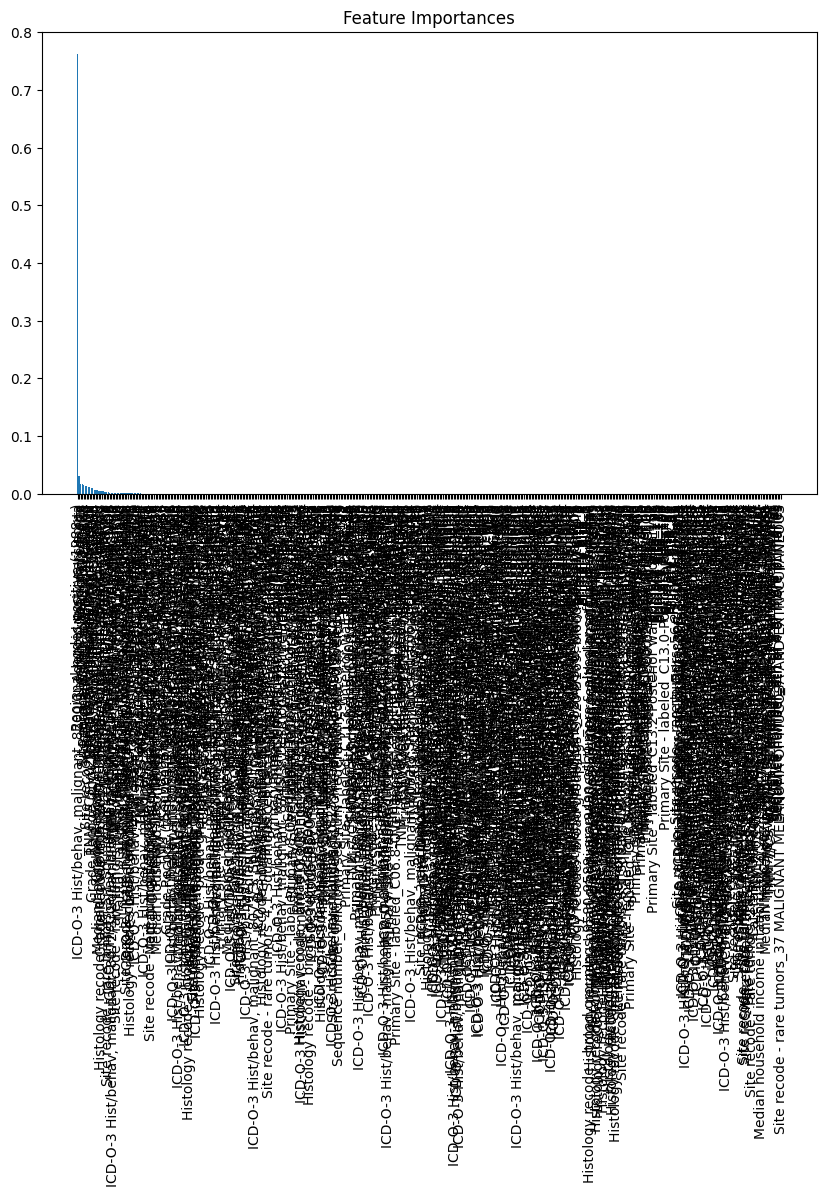

In [22]:
# Get feature importances
feature_importances = clf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]

# Print and plot feature importances
for i, idx in enumerate(sorted_indices):
    print(f"Feature {i + 1}: {X.columns[idx]} - Importance: {feature_importances[idx]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.show()

Top 10 Most Important Features:
Feature 1: Regional nodes positive (1988+) - Importance: 0.7627999244824044
Feature 2: ICD-O-3 Hist/behav, malignant_8200/3: Adenoid cystic carcinoma - Importance: 0.030494183390558118
Feature 3: Laterality_Not a paired  site - Importance: 0.017737424432450355
Feature 4: Year of diagnosis - Importance: 0.016149619881281867
Feature 5: Site recode ICD-O-3/WHO 2008_Tonsil - Importance: 0.014919187213341494
Feature 6: Regional nodes examined (1988+) - Importance: 0.013681857578901804
Feature 7: Site recode ICD-O-3/WHO 2008_Salivary Gland - Importance: 0.013484525263940488
Feature 8: Age recode with single ages and 90 - Importance: 0.012404044194988282
Feature 9: Marital status at diagnosis_Unknown - Importance: 0.010973486741169576
Feature 10: TNM 7/CS v0204+ Schema recode_TongueAnterior - Importance: 0.01022498395293639


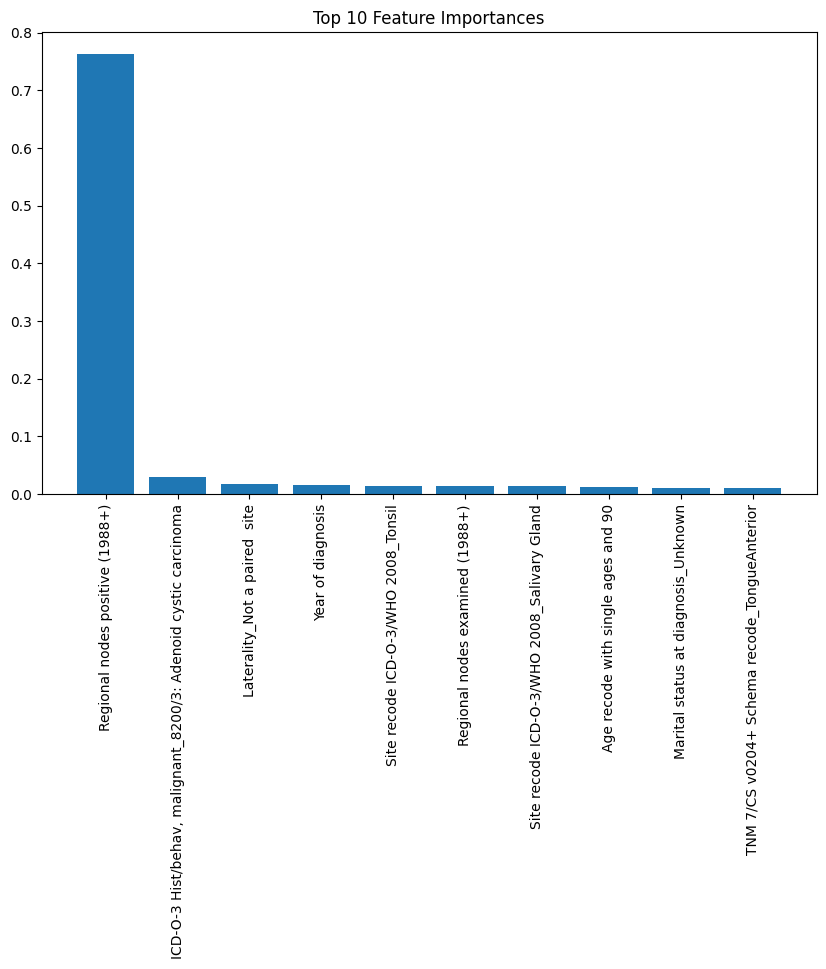

In [23]:
top_10_indices = feature_importances.argsort()[::-1][:10]

print("Top 10 Most Important Features:")
for i, idx in enumerate(top_10_indices):
    print(f"Feature {i + 1}: {X.columns[idx]} - Importance: {feature_importances[idx]}")

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importances[top_10_indices])
plt.xticks(range(10), [X.columns[idx] for idx in top_10_indices], rotation=90)
plt.title("Top 10 Feature Importances")
plt.show()


In [26]:
# Convert y_test to a NumPy array of floats if it's not already
y_test = np.array(y_test, dtype=float)

# Make predictions on the entire y_test dataset
y_pred_all = clf.predict(X_test)

# Print the actual values and predicted values
for actual, predicted in zip(y_test, y_pred_all):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Actual: 1.00, Predicted: 1.00
Actual: 2.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 2.00, Predicted: 2.00
Actual: 1.00, Predicted: 1.00
Actual: 2.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 2.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 2.00, Predicted: 1.00
Actual: 2.00, Predicted: 2.00
Actual: 1.00, Predicted: 2.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 2.00, Predicted: 2.00
Actual: 2.00, Predicted: 2.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 2.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 2.00
Actual: 2.00, Predicted: 1.00
Actual: 2.00, Predicted: 2.00
Actual: 1.00, Predicted: 1.00
Actual: 1.00, Predicted: 1.00
Actual: 1.